## Exercise 00: Line chart

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

query = """
        SELECT datetime
        FROM pageviews
        WHERE uid LIKE 'user_%'
        """
df = pd.read_sql_query(query, con)
print(df.head())



                     datetime
0  2020-04-17 22:46:26.785035
1  2020-04-18 10:53:52.623447
2  2020-04-18 10:56:55.833899
3  2020-04-18 10:57:37.331258
4  2020-04-18 12:05:48.200144


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
views_per_day = df.groupby(df['datetime'].dt.date).count()
views_per_day.columns = ['views']
print(views_per_day)

            views
datetime         
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2


<Axes: title={'center': 'Views per Day'}, xlabel='datetime'>

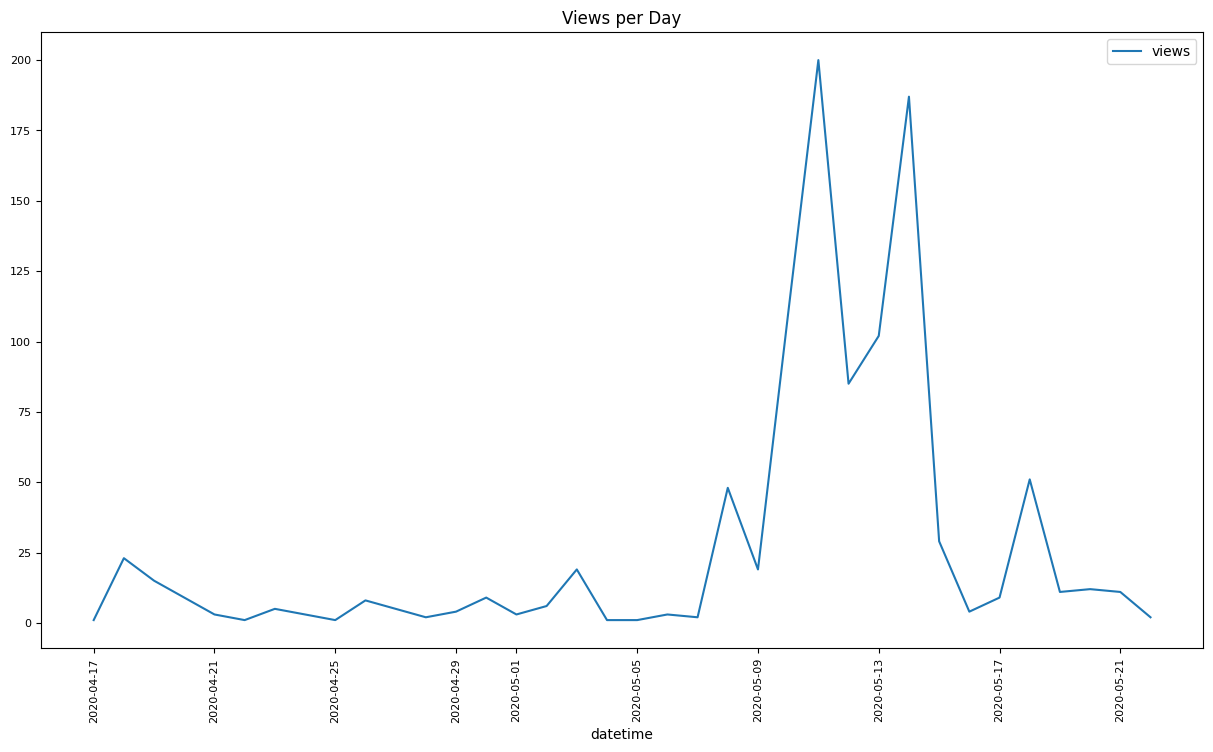

In [4]:
views_per_day.plot(
    fontsize=8,
    figsize=(15, 8),
    title='Views per Day',
    rot=90
)

In [5]:
con.close()